# <font color="#6A95A6">CREDIT SCORE CLASSIFICATION

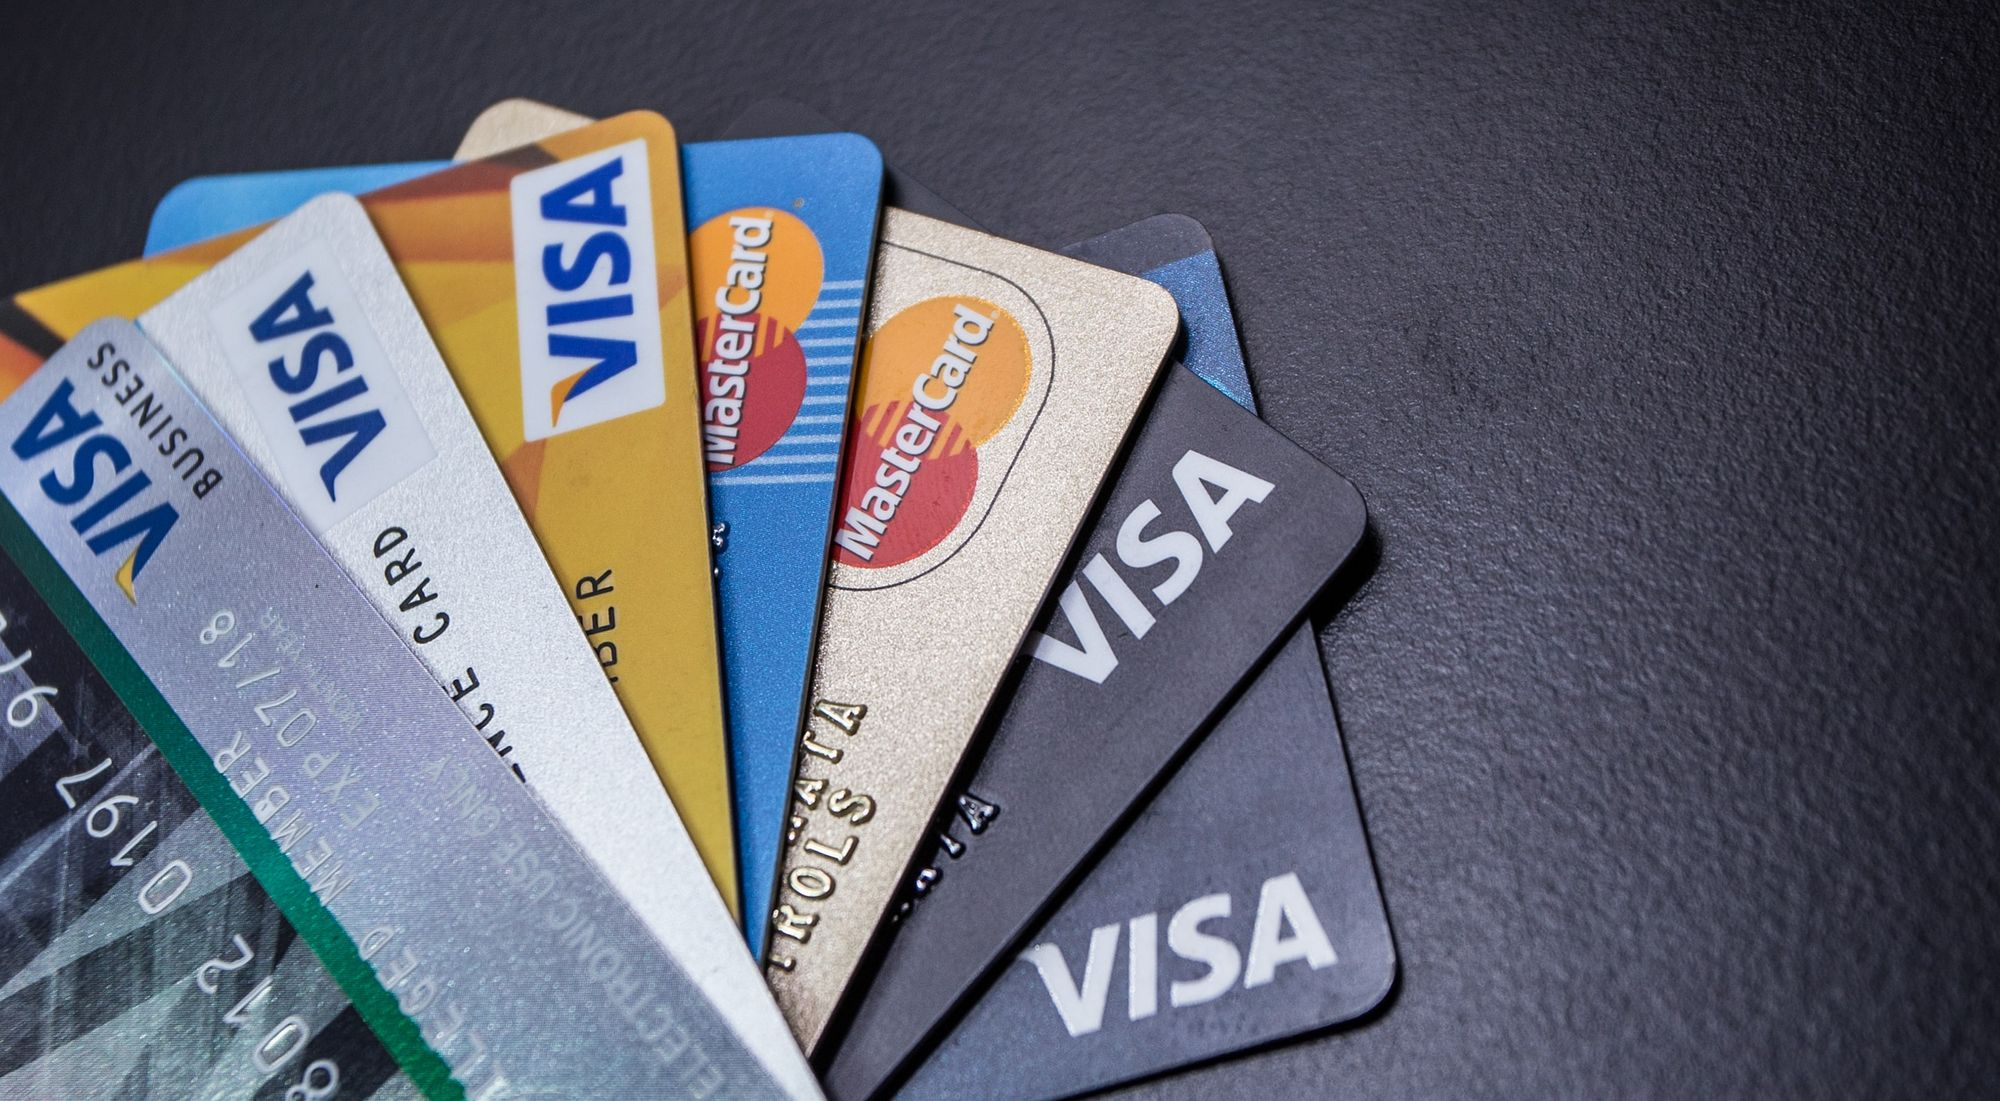

## <font color="#6A95A6"> Aim

The goal of this project is to predict the **Credit Score** of customers based on their financial and transactional data. Accurate prediction of credit scores is crucial for financial institutions to assess creditworthiness, manage risks, and make informed lending decisions. The dataset contains detailed information about customers, including demographic, income, credit, and payment behavior attributes.


## <font color="#6A95A6"> Dataset Explanation

| **Column Name**              | **Description**                                                                                 |
|-------------------------------|---------------------------------------------------------------------------------------------|
| **ID**                       | Unique identifier for each transaction.                                                      |
| **Customer_ID**              | Unique identifier for each customer.                                                         |
| **Month**                    | Transaction month (as a numeric value).                                                      |
| **Name**                     | Full name of the customer.                                                                   |
| **Age**                      | Age of the customer (in years).                                                              |
| **SSN**                      | Social Security Number of the customer.                                                      |
| **Occupation**               | The customer's profession or job type.                                                       |
| **Annual_Income**            | The customer's total yearly income.                                                          |
| **Monthly_Inhand_Salary**    | Monthly take-home salary of the customer.                                                    |
| **Num_Bank_Accounts**        | Number of bank accounts the customer owns.                                                   |
| **Num_Credit_Card**          | Number of credit cards owned by the customer.                                                |
| **Interest_Rate**            | Average interest rate on the customer's loans.                                               |
| **Num_of_Loan**              | Total number of loans taken by the customer.                                                 |
| **Type_of_Loan**             | Types of loans the customer has (e.g., Auto Loan, Personal Loan).                            |
| **Delay_from_due_date**      | Average delay (in days) for payments beyond the due date.                                     |
| **Num_of_Delayed_Payment**   | Number of payments delayed by the customer.                                                  |
| **Changed_Credit_Limit**     | Percentage change in the customer's credit limit.                                             |
| **Num_Credit_Inquiries**     | Number of credit inquiries made about the customer.                                           |
| **Credit_Mix**               | The diversity of credit types the customer uses (e.g., Good, Bad).                           |
| **Outstanding_Debt**         | Total outstanding debt of the customer.                                                      |
| **Credit_Utilization_Ratio** | Percentage of credit limit utilized by the customer.                                          |
| **Credit_History_Age**       | Age of the customer's credit history (in years).                                             |
| **Payment_of_Min_Amount**    | Indicates whether the customer pays the minimum amount due ("Yes" or "No").                  |
| **Total_EMI_per_month**      | Total Equated Monthly Installments paid by the customer.                                      |
| **Amount_invested_monthly**  | Monthly investment amount by the customer.                                                   |
| **Payment_Behaviour**        | Pattern of customer payments (e.g., High spent, Low spent).                                  |
| **Monthly_Balance**          | Average monthly balance after expenses.                                                      |
| **Credit_Score**             | Target variable indicating the customer's creditworthiness (e.g., Good, Bad).                |

This table provides a clear and structured overview of the dataset columns, making it easy to understand their significance for predicting the credit score.


## <font color="#6A95A6"> Requirements

In [266]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## <font color="#6A95A6"> Import Data

In [12]:
df=pd.read_csv("train.csv")

## <font color="#6A95A6"> EDA (Exploratory Data Analysis)

In [14]:
df.head()

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12            1824.843333                3.0              4.0   
1       19114.12            1824.843333                3.0              4.0   
2       19114.12            1824.843333                3.0              4.0   
3       19114.12            1824.843333                3.0              4.0   
4       19114.12            1824.843333                3.0              4.0   

   Interest_Rate  Num_of_Loan  \
0            3.0          4.0   
1            3.0          4.0   
2            3.0          4.0   
3            3.0          4.0   
4            3.0          4.0   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                  5.0   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     4.0                 11.27                   4.0   
2                     7.0                 11.27                   4.0   
3                     4.0                  6.27                   4.0   
4                     4.0                 11.27                   4.0   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                 26.822620               265.0   
1       Good            809.98                 31.944960               266.0   
2       Good            809.98                 28.609352               267.0   
3       Good            809.98                 31.377862               268.0   
4       Good            809.98                 24.797347               269.0   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                 21.46538   
1                    No            49.574949                 21.46538   
2                    No            49.574949                 21.46538   
3                    No            49.574949                 21.46538   
4                    No            49.574949                 21.46538   

                  Payment_Behaviour  Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments       312.494089         Good  
1    Low_spent_Large_value_payments       284.629162         Good  
2   Low_spent_Medium_value_payments       331.209863         Good  
3    Low_spent_Small_value_payments       223.451310         Good  
4  High_spent_Medium_value_payments       341.489231         Good

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [21]:
df.shape

(100000, 28)

In [19]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [27]:
df.describe().T

count          mean           std           min  \
ID                        100000.0  8.063150e+04  4.330149e+04   5634.000000   
Customer_ID               100000.0  2.598267e+04  1.434054e+04   1006.000000   
Month                     100000.0  4.500000e+00  2.291299e+00      1.000000   
Age                       100000.0  3.331634e+01  1.076481e+01     14.000000   
SSN                       100000.0  5.004617e+08  2.908267e+08  81349.000000   
Annual_Income             100000.0  5.050512e+04  3.829942e+04   7005.930000   
Monthly_Inhand_Salary     100000.0  4.197271e+03  3.186432e+03    303.645417   
Num_Bank_Accounts         100000.0  5.368820e+00  2.593314e+00      0.000000   
Num_Credit_Card           100000.0  5.533570e+00  2.067098e+00      0.000000   
Interest_Rate             100000.0  1.453208e+01  8.741330e+00      1.000000   
Num_of_Loan               100000.0  3.532880e+00  2.446356e+00      0.000000   
Delay_from_due_date       100000.0  2.108141e+01  1.480456e+01      0.000000   
Num_of_Delayed_Payment    100000.0  1.331312e+01  6.237166e+00      0.000000   
Changed_Credit_Limit      100000.0  1.047032e+01  6.609481e+00      0.500000   
Num_Credit_Inquiries      100000.0  5.798250e+00  3.867826e+00      0.000000   
Outstanding_Debt          100000.0  1.426220e+03  1.155129e+03      0.230000   
Credit_Utilization_Ratio  100000.0  3.228517e+01  5.116875e+00     20.000000   
Credit_History_Age        100000.0  2.212205e+02  9.968072e+01      1.000000   
Total_EMI_per_month       100000.0  1.076992e+02  1.322671e+02      0.000000   
Amount_invested_monthly   100000.0  5.510131e+01  3.900693e+01      0.000000   
Monthly_Balance           100000.0  3.926976e+02  2.016527e+02      0.007760   

                                   25%           50%           75%  \
ID                        4.313275e+04  8.063150e+04  1.181302e+05   
Customer_ID               1.366450e+04  2.577700e+04  3.838500e+04   
Month                     2.750000e+00  4.500000e+00  6.250000e+00   
Age                       2.400000e+01  3.300000e+01  4.200000e+01   
SSN                       2.451686e+08  5.006886e+08  7.560027e+08   
Annual_Income             1.934297e+04  3.699971e+04  7.168347e+04   
Monthly_Inhand_Salary     1.626594e+03  3.095905e+03  5.957715e+03   
Num_Bank_Accounts         3.000000e+00  5.000000e+00  7.000000e+00   
Num_Credit_Card           4.000000e+00  5.000000e+00  7.000000e+00   
Interest_Rate             7.000000e+00  1.300000e+01  2.000000e+01   
Num_of_Loan               2.000000e+00  3.000000e+00  5.000000e+00   
Delay_from_due_date       1.000000e+01  1.800000e+01  2.800000e+01   
Num_of_Delayed_Payment    9.000000e+00  1.400000e+01  1.800000e+01   
Changed_Credit_Limit      5.380000e+00  9.400000e+00  1.485000e+01   
Num_Credit_Inquiries      3.000000e+00  5.000000e+00  8.000000e+00   
Outstanding_Debt          5.660725e+02  1.166155e+03  1.945963e+03   
Credit_Utilization_Ratio  2.805257e+01  3.230578e+01  3.649666e+01   
Credit_History_Age        1.440000e+02  2.190000e+02  3.020000e+02   
Total_EMI_per_month       2.926889e+01  6.646230e+01  1.473926e+02   
Amount_invested_monthly   2.795911e+01  4.515655e+01  7.129580e+01   
Monthly_Balance           2.676160e+02  3.338654e+02  4.632157e+02   

                                   max  
ID                        1.556290e+05  
Customer_ID               5.099900e+04  
Month                     8.000000e+00  
Age                       5.600000e+01  
SSN                       9.999934e+08  
Annual_Income             1.799873e+05  
Monthly_Inhand_Salary     1.520463e+04  
Num_Bank_Accounts         1.100000e+01  
Num_Credit_Card           1.100000e+01  
Interest_Rate             3.400000e+01  
Num_of_Loan               9.000000e+00  
Delay_from_due_date       6.200000e+01  
Num_of_Delayed_Payment    2.500000e+01  
Changed_Credit_Limit      2.998000e+01  
Num_Credit_Inquiries      1.700000e+01  
Outstanding_Debt          4.998070e+03  
Credit_Utilization_Ratio  5.00

In [25]:
df["Occupation"].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [31]:
df["Type_of_Loan"].nunique()

6261

In [33]:
df["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [35]:
df["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [42]:
df["Payment_of_Min_Amount"].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [68]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

## <font color="#6A95A6"> Data Visualization

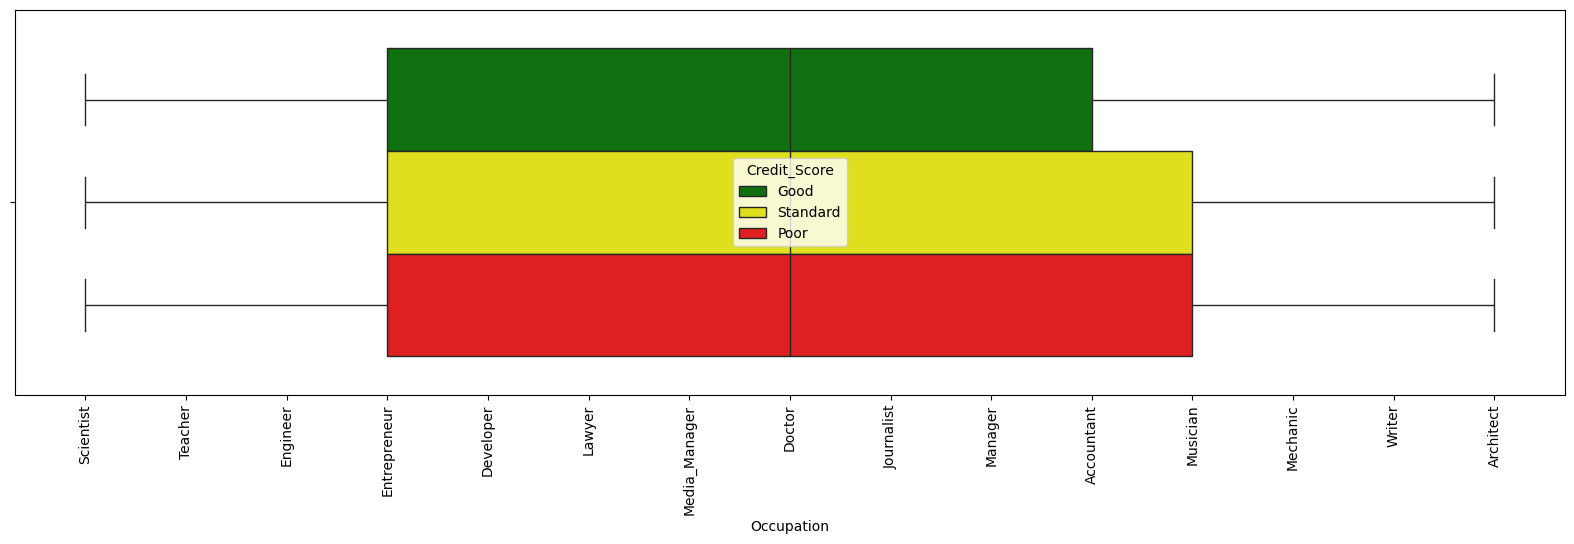

In [188]:
plt.figure(figsize=(20,5))
color={"Poor":"red","Standard":"yellow","Good":"green"}
sns.boxplot(x=df["Occupation"],hue=df["Credit_Score"],palette=color)
plt.xticks(rotation=90);

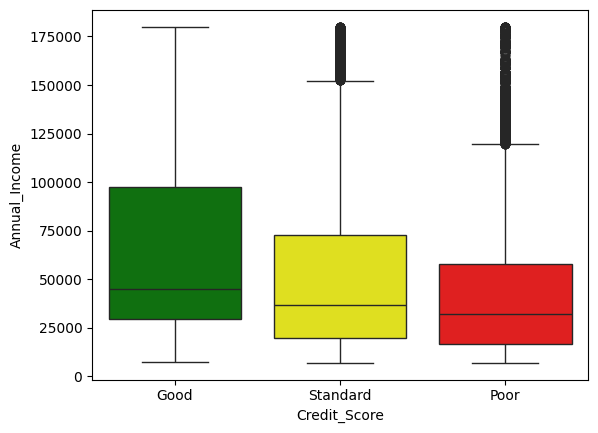

In [194]:
sns.boxplot(x=df["Credit_Score"],y=df["Annual_Income"],palette=color);

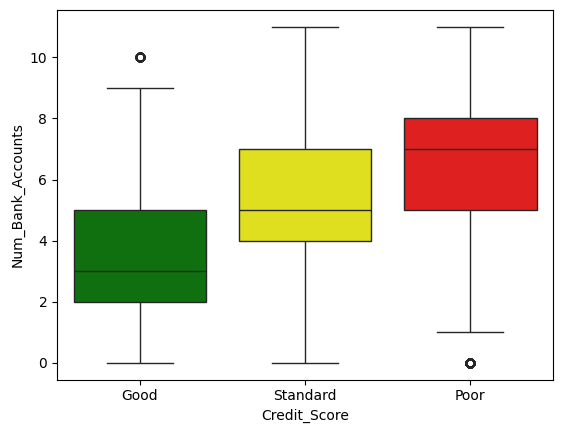

In [202]:
sns.boxplot(y=df["Num_Bank_Accounts"],x=df["Credit_Score"],palette=color);

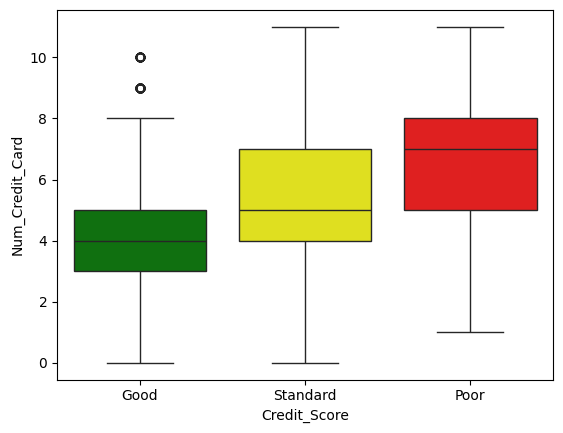

In [204]:
sns.boxplot(y=df["Num_Credit_Card"],x=df["Credit_Score"],palette=color);

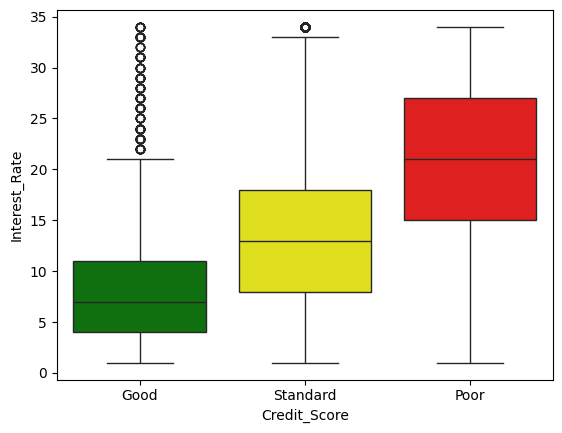

In [206]:
sns.boxplot(y=df["Interest_Rate"],x=df["Credit_Score"],palette=color);

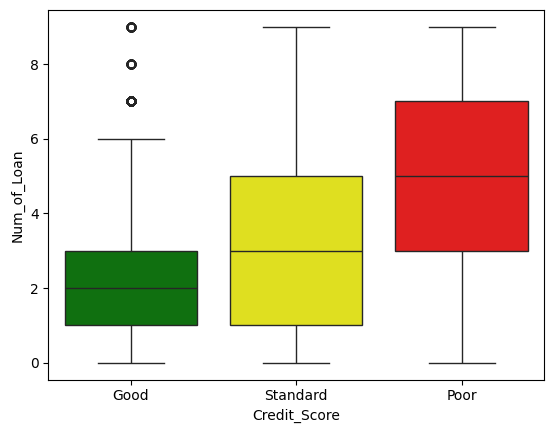

In [208]:
sns.boxplot(y=df["Num_of_Loan"],x=df["Credit_Score"],palette=color);

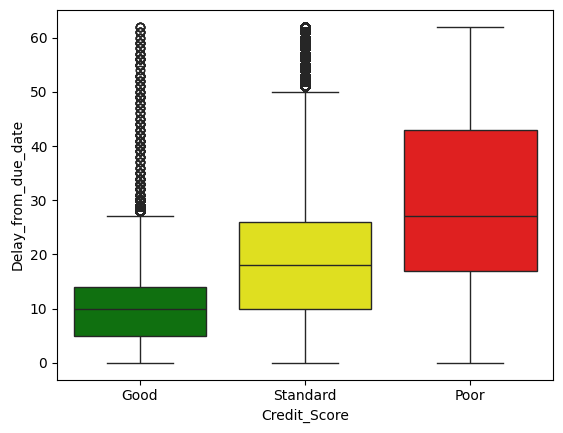

In [210]:
sns.boxplot(y=df["Delay_from_due_date"],x=df["Credit_Score"],palette=color);

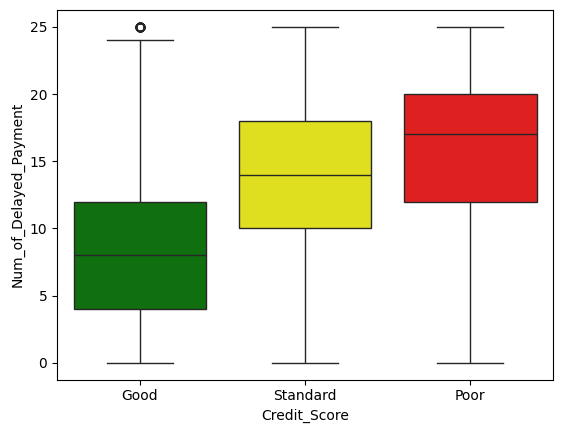

In [212]:
sns.boxplot(y=df["Num_of_Delayed_Payment"],x=df["Credit_Score"],palette=color);

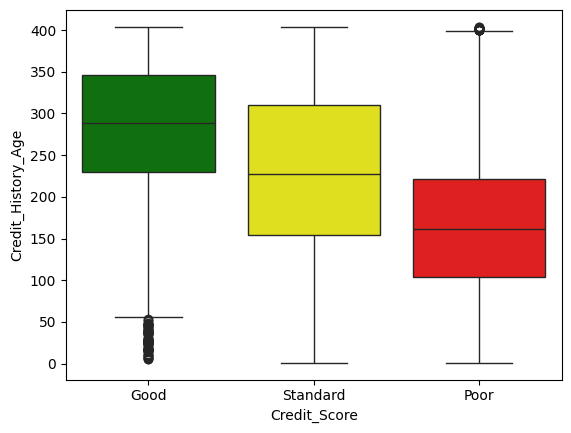

In [214]:
sns.boxplot(y=df["Credit_History_Age"],x=df["Credit_Score"],palette=color);

## <font color="#6A95A6"> Modelling with Conversational Methods

In [222]:
x=df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance","Occupation",'Num_Credit_Inquiries',
                'Payment_of_Min_Amount','Total_EMI_per_month']]
y=df[["Credit_Score"]]

In [224]:
x=pd.get_dummies(x,drop_first=True)

In [260]:
def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    
    algos = [g, b, l, d, rf, h, k]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier']

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    # Get unique labels from df["Credit_Score"]
    labels = sorted(y["Credit_Score"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues")
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]


Confusion Matrix of Random Forest Classifier


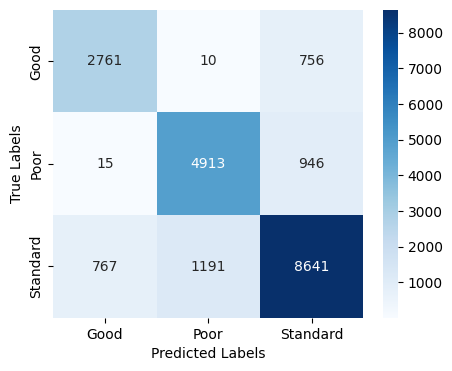

Confusion Matrix of KNeighbors Classifier


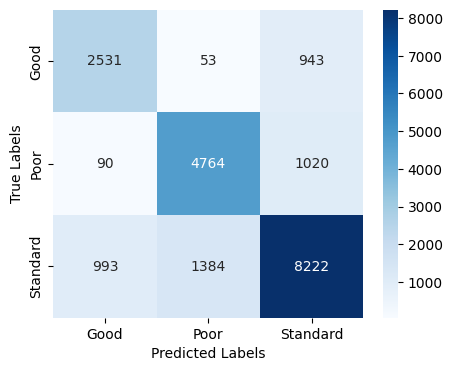

Confusion Matrix of Decision Tree Classifier


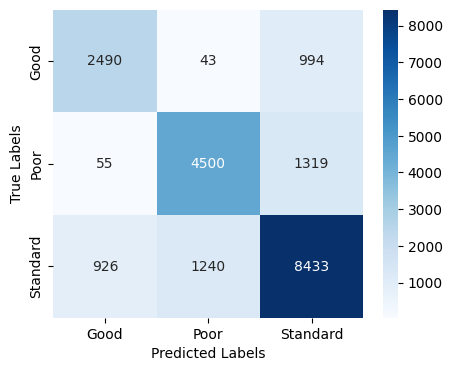

Confusion Matrix of Gradient Boosting Classifier


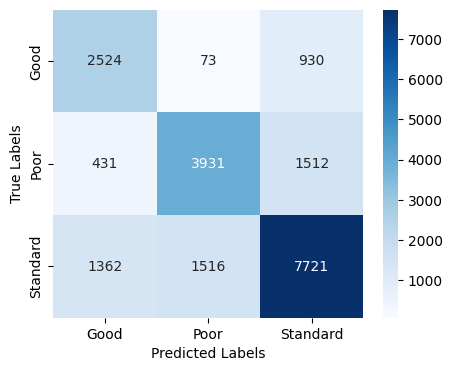

Confusion Matrix of Bernoulli NB


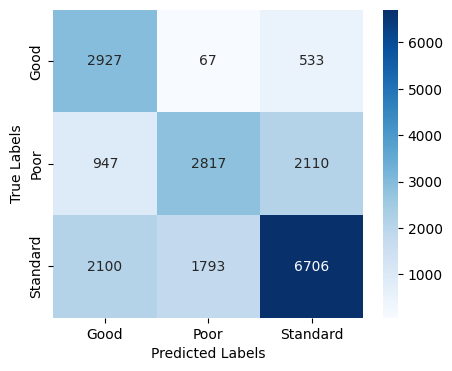

Confusion Matrix of Gaussian NB


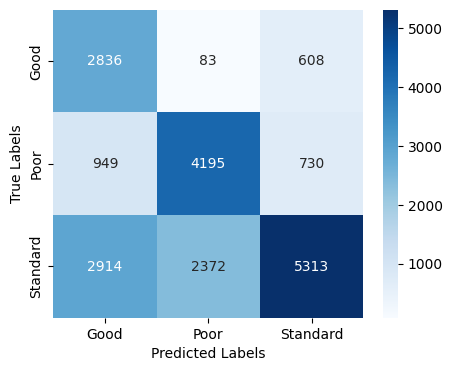

Confusion Matrix of Logistic Regression


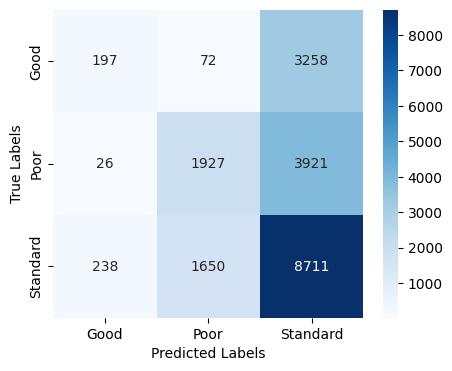

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

        Good       0.78      0.78      0.78      3527
        Poor       0.80      0.84      0.82      5874
    Standard       0.84      0.82      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000

Classification Report of KNeighbors Classifier:
              precision    recall  f1-score   support

        Good       0.70      0.72      0.71      3527
        Poor       0.77      0.81      0.79      5874
    Standard       0.81      0.78      0.79     10599

    accuracy                           0.78     20000
   macro avg       0.76      0.77      0.76     20000
weighted avg       0.78      0.78      0.78     20000

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

        Good       0.72      0.71

Accuracy Score
Random Forest Classifier             0.81575
KNeighbors Classifier                0.77585
Decision Tree Classifier             0.77115
Gradient Boosting Classifier         0.70880
Bernoulli NB                         0.62250
Gaussian NB                          0.61720
Logistic Regression                  0.54175

In [262]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

## <font color="#6A95A6"> Modelling with Deep Learning

In [367]:
x=df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance","Occupation",'Num_Credit_Inquiries',
                'Payment_of_Min_Amount','Total_EMI_per_month']]
y=df[["Credit_Score"]]

In [347]:
x=pd.get_dummies(x,drop_first=True)

In [349]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y['Credit_Score'])

In [351]:
model=Sequential()
model.add(Dense(8,activation='relu')) 
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [353]:
x_train , x_test, y_train, y_test =train_test_split(x,y,test_size=.2,random_state=42)

In [355]:
x_train.shape,y_train.shape

((80000, 31), (80000,))

In [357]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=.20,verbose=0)

In [358]:
predictions=model.predict(x_test)
predictions_labels = np.argmax(predictions, axis=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [359]:
accuracy_score(predictions_labels,y_test)

0.52995

## <font color="#6A95A6"> Picking and Saving the Best Algorithm

In [447]:
x=df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]]
y=df[["Credit_Score"]]
x=pd.get_dummies(x,drop_first=True)

In [449]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
model=rf.fit(x_train, y_train)
p = model.predict(x_test)
accuracy_score(y_test, p)

0.81225

In [450]:
import joblib
joblib.dump(model, 'rf_model.pkl')

['rf_model.pkl']

## <font color="#6A95A6"> Results and Observations

After applying various classification methods to predict the `Credit_Score`, the following results were observed:

| **Model**                      | **Accuracy Score** |
|--------------------------------|--------------------|
| Random Forest Classifier       | 0.81575            |
| KNeighbors Classifier          | 0.77585            |
| Decision Tree Classifier       | 0.77115            |
| Gradient Boosting Classifier   | 0.70880            |
| Bernoulli NB                   | 0.62250            |
| Gaussian NB                    | 0.61720            |
| Logistic Regression            | 0.54175            |

Among these models, the **Random Forest Classifier** performed the best, achieving an accuracy of **81.57%**. Its classification report indicates the following:

- **Good** credit scores were predicted with 78% precision and 78% recall.
- **Poor** credit scores had 80% precision and 84% recall.
- **Standard** credit scores achieved the highest precision (84%) and recall (82%).

The weighted average F1-score for the Random Forest Classifier was **82%**, showcasing its robustness in handling imbalanced class distributions.

In contrast, when the model was trained using a deep learning approach, the accuracy dropped significantly to **53%**, which is below the performance of even the simplest classification models like Logistic Regression. 

Overall, traditional machine learning methods like the Random Forest Classifier outperformed the deep learning model for this dataset.